In [1]:
from torchvision import datasets, models, transforms
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torchvision import *
from PIL import Image
import os


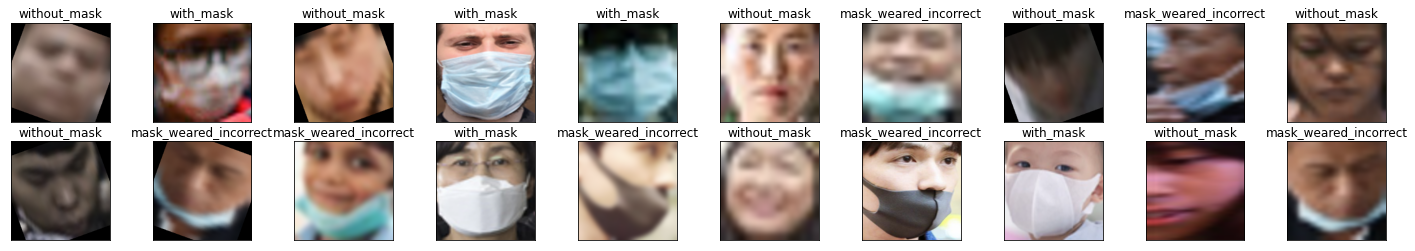

In [2]:
# file path of training, validating and testing data in Google drive
train_path = 'C:\\Users\\jerry\\Downloads\\aps360\\better_augmented\\training'
val_path = 'C:\\Users\\jerry\\Downloads\\aps360\\better_augmented\\validation'
test_path = 'C:\\Users\\jerry\\Downloads\\aps360\\better_augmented\\testing'

# transform setting
transform = transforms.Compose([transforms.Resize((224, 224)),
                               transforms.ToTensor()])

# Load data from Google Drive
train_set = torchvision.datasets.ImageFolder(train_path, transform=transform)
val_set = torchvision.datasets.ImageFolder(val_path, transform=transform)
test_set = torchvision.datasets.ImageFolder(test_path, transform=transform)
# overfit_set = torchvision.datasets.ImageFolder(overfit_path, transform=transform)

# Verification Step - obtain one batch of images
dataiter = iter(torch.utils.data.DataLoader(train_set, batch_size=27, num_workers=1, shuffle=True))
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

classes = ['mask_weared_incorrect', 'with_mask', 'without_mask']

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [3]:
resnet152 = models.resnet152(pretrained=True)
layer = resnet152._modules.get('avgpool')
resnet152.eval()

rm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (7): Bottleneck(
      (conv1): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(1024, eps=1e-05, momentum=0.1, aff

In [4]:
preprocess = transforms.Compose([
    transforms.Scale(224, 224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


def extract_feature_152(img_path):
    img = Image.open(img_path).convert('RGB')

    input_tensor = preprocess(img)
    input_batch = Variable(input_tensor.unsqueeze(0))

    feature = torch.zeros(2048)
    def copy_data(m, i, o):
        feature.copy_(o.data.reshape(o.data.size(1)))

    h = layer.register_forward_hook(copy_data)

    resnet152(input_batch)

    h.remove()
    return feature

In [27]:
preprocess = transforms.Compose([
    transforms.Scale(224, 224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img = Image.open('C:\\Users\\jerry\\Downloads\\aps360\\better_augmented\\validation\\without_mask\\7.png').convert('RGB')
input_tensor = preprocess(img)
input_batch = Variable(input_tensor.unsqueeze(0))
print(input_batch)

tensor([[[[-1.6555, -1.6555, -1.6555,  ..., -1.2445, -1.2445, -1.2445],
          [-1.6555, -1.6555, -1.6555,  ..., -1.2445, -1.2445, -1.2445],
          [-1.6555, -1.6555, -1.6555,  ..., -1.2445, -1.2445, -1.2445],
          ...,
          [-1.6898, -1.6898, -1.6898,  ..., -1.6555, -1.6555, -1.6555],
          [-1.6898, -1.6898, -1.6898,  ..., -1.6555, -1.6555, -1.6555],
          [-1.6898, -1.6898, -1.6898,  ..., -1.6555, -1.6555, -1.6555]],

         [[-1.5630, -1.5630, -1.5630,  ..., -1.1253, -1.1253, -1.1253],
          [-1.5630, -1.5630, -1.5630,  ..., -1.1253, -1.1253, -1.1253],
          [-1.5630, -1.5630, -1.5630,  ..., -1.1253, -1.1253, -1.1253],
          ...,
          [-1.5980, -1.5980, -1.5980,  ..., -1.5630, -1.5630, -1.5630],
          [-1.5980, -1.5980, -1.5980,  ..., -1.5630, -1.5630, -1.5630],
          [-1.5980, -1.5980, -1.5980,  ..., -1.5630, -1.5630, -1.5630]],

         [[-1.2990, -1.2990, -1.2990,  ..., -0.5670, -0.5670, -0.5670],
          [-1.2990, -1.2990, -

In [6]:
ex = train_path + "\\with_mask\\970.png"
vec = extract_feature_152(ex)
print(vec)

tensor([0.0953, 0.1180, 0.3478,  ..., 0.6993, 0.4656, 0.2901])


In [7]:
# =============================
# resnet152 run only once
# =============================

train_loader = torch.utils.data.DataLoader(train_set, batch_size=1, 
                                           num_workers=1, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1, 
                                           num_workers=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, 
                                            num_workers=1, shuffle=True)

loaders = [train_loader, val_loader, test_loader]
feature_paths = ['C:\\Users\\jerry\\Downloads\\aps360\\feature\\resnet152\\training\\', 
         'C:\\Users\\jerry\\Downloads\\aps360\\feature\\resnet152\\validation\\', 
         'C:\\Users\\jerry\\Downloads\\aps360\\feature\\resnet152\\testing\\']

data_paths = ['C:\\Users\\jerry\\Downloads\\aps360\\better_augmented\\training',
        'C:\\Users\\jerry\\Downloads\\aps360\\better_augmented\\validation',
        'C:\\Users\\jerry\\Downloads\\aps360\\better_augmented\\testing']

labels = ['with_mask', 'without_mask', 'mask_weared_incorrect']

for step in range(3):
    n = 0
    for label in labels:
        for filename in os.listdir(data_paths[step] + "\\" + label):
            if filename.endswith('.png'):
                image_path = data_paths[step] + "\\" + label + "\\" + filename
                feature_tensor = extract_feature_152(image_path)
                feature_path = feature_paths[step] + label + "\\"
                torch.save(feature_tensor, feature_path + str(n) + ".tensor")
                if step == 0 and label == "with_mask" and filename == "970.png":
                    print("image_path: ", image_path)
                    print("feature_tensor: ", feature_tensor)
                    print("save_path: ", feature_path + str(n) + ".tensor")
                n += 1
print("done")

image_path:  C:\Users\jerry\Downloads\aps360\better_augmented\training\with_mask\970.png
feature_tensor:  tensor([0.0953, 0.1180, 0.3478,  ..., 0.6993, 0.4656, 0.2901])
save_path:  C:\Users\jerry\Downloads\aps360\feature\resnet152\training\with_mask\2232.tensor
done


In [9]:
tensor = torch.load('C:\\Users\\jerry\\Downloads\\aps360\\feature\\resnet152\\training\\with_mask\\2232.tensor')
print(tensor)
tensor.size()

tensor([0.0953, 0.1180, 0.3478,  ..., 0.6993, 0.4656, 0.2901])


torch.Size([2048])

In [10]:
feature_train_set = torchvision.datasets.DatasetFolder(feature_paths[0], loader=torch.load, extensions=('.tensor'))
feature_val_set = torchvision.datasets.DatasetFolder(feature_paths[1], loader=torch.load, extensions=('.tensor'))
feature_test_set = torchvision.datasets.DatasetFolder(feature_paths[2], loader=torch.load, extensions=('.tensor'))

In [31]:
feature_train_loader = torch.utils.data.DataLoader(feature_train_set, batch_size=1, num_workers=1, shuffle=True)
feature_val_loader = torch.utils.data.DataLoader(feature_val_set, batch_size=1, num_workers=1, shuffle=True)
feature_test_loader = torch.utils.data.DataLoader(feature_test_set, batch_size=1, num_workers=1, shuffle=True)

In [20]:
def evaluate(model, test_set):
    model.eval()
    correct = 0
    total = 0

    for imgs, labels in torch.utils.data.DataLoader(test_set):
        if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()

        output = model(imgs)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]

    return correct / total

In [29]:
def get_accuracy(model, train_set, val_set, train=False):
    if train:
        data = train_set
    else:
        data = val_set
   
    correct = 0
    total = 0

    for imgs, labels in torch.utils.data.DataLoader(data):
        if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()

        output = model(imgs)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]

    return correct / total

In [13]:
def train (model, train_set, val_set, batch_size=32, learning_rate=0.0001, num_epoch=1):
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    validation_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []
    for epoch in range(num_epoch):
        print("epoch: ", epoch)
        for imgs, labels in iter(train_loader):
            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()

            output = model(imgs)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        iters.append(epoch)
        losses.append(float(loss) / batch_size)
        train_acc.append(get_accuracy(model, train_set, val_set, train=True))
        val_acc.append(get_accuracy(model, train_set, val_set, train=False))

        print("epoch: {}, training_accuracy:{}, validation_accuracy:{}".format(epoch, train_acc[-1], val_acc[-1]))
    plt.title("training_loss")
    plt.plot(iters, losses, label="loss")
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.show()

    plt.title("accuracy")
    plt.plot(iters, train_acc, label="train")
    plt.plot(iters, val_acc, label="validation")
    plt.xlabel("iteration")
    plt.ylabel("accuracy")
    plt.legend(loc='best')
    plt.show

    print ("Final training accuracy:{}".format(train_acc[-1]))
    print ("Final validation accuracy:{}".format(val_acc[-1]))

In [28]:
def get_accuracy_each_class(model, data_loader, v_class):
  
  # for the later dropout model, use this to flag testing mode
  #model.eval()
  
  correct = 0
  total = 0
  for imgs, labels in data_loader:
    
    if labels == v_class: 
      # print(labels)

      # enable GPU
      if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()

      output = model(imgs)

      #select index with maximum prediction score
      pred = output.max(1, keepdim=True)[1]
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += imgs.shape[0]
  return correct / total

In [14]:
#Artifical Neural Network Architecture
class ANNClassifier_152(nn.Module):
    def __init__(self):
        super(ANNClassifier_152, self).__init__()
        self.fc1 = nn.Linear(2048, 1000)
        self.fc2 = nn.Linear(1000, 3)

    def forward(self, x):
        x = x.view(-1, 2048) #flatten feature data
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

epoch:  0
epoch: 0, training_accuracy:0.7421562082777036, validation_accuracy:0.7344236760124611
epoch:  1
epoch: 1, training_accuracy:0.8179238985313751, validation_accuracy:0.7811526479750779
epoch:  2
epoch: 2, training_accuracy:0.8459612817089452, validation_accuracy:0.8099688473520249
epoch:  3
epoch: 3, training_accuracy:0.8564753004005341, validation_accuracy:0.8325545171339563
epoch:  4
epoch: 4, training_accuracy:0.8661548731642189, validation_accuracy:0.8489096573208723
epoch:  5
epoch: 5, training_accuracy:0.875, validation_accuracy:0.8465732087227414
epoch:  6
epoch: 6, training_accuracy:0.8830106809078772, validation_accuracy:0.8504672897196262
epoch:  7
epoch: 7, training_accuracy:0.883177570093458, validation_accuracy:0.8559190031152648
epoch:  8
epoch: 8, training_accuracy:0.8893524699599465, validation_accuracy:0.8535825545171339
epoch:  9
epoch: 9, training_accuracy:0.8886849132176236, validation_accuracy:0.8613707165109035
epoch:  10
epoch: 10, training_accuracy:0.89

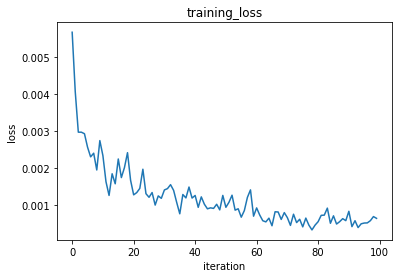

Final training accuracy:0.9873164218958611
Final validation accuracy:0.8948598130841121


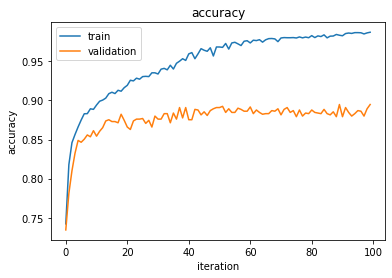

In [18]:
use_cuda = True
torch.manual_seed(1)
model_ANN_152 = ANNClassifier_152()
if use_cuda and torch.cuda.is_available():
    model_ANN_152.cuda()

train(model_ANN_152, feature_train_set, feature_val_set, batch_size=128, learning_rate=0.001, num_epoch=100)

In [21]:
test_accuracy = evaluate(model_ANN_152, feature_test_set)
print("test_accuracy: ", test_accuracy)

test_accuracy:  0.868380062305296


In [32]:
mask_weared_incorrect_accuracy = get_accuracy_each_class(model_ANN_152, feature_test_loader, 0)
with_mask_accuracy = get_accuracy_each_class(model_ANN_152, feature_test_loader, 1)
without_mask_accuracy = get_accuracy_each_class(model_ANN_152, feature_test_loader, 2)

print("class=mask_worn_incorrectly, accuracy={}\nclass=with_mask, accuracy={}\nclass=without_mask, accuracy={}".format(mask_weared_incorrect_accuracy, with_mask_accuracy, without_mask_accuracy))

class=mask_worn_incorrectly, accuracy=0.6666666666666666
class=with_mask, accuracy=0.9649484536082474
class=without_mask, accuracy=0.9325581395348838


In [24]:
#Artifical Neural Network Architecture
class ANNClassifier_dropout(nn.Module):
    def __init__(self):
        super(ANNClassifier_dropout, self).__init__()
        self.fc1 = nn.Linear(2048, 1000)
        self.dropout1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(1000, 3)
        self.dropout2 = nn.Dropout(0.4)

    def forward(self, x):
        x = x.view(-1, 2048) #flatten feature data
        x = F.relu(self.fc1(self.dropout1(x)))
        x = self.fc2(self.dropout2(x))
        return x

epoch:  0
epoch: 0, training_accuracy:0.7132843791722296, validation_accuracy:0.6884735202492211
epoch:  1
epoch: 1, training_accuracy:0.7728638184245661, validation_accuracy:0.7453271028037384
epoch:  2
epoch: 2, training_accuracy:0.802570093457944, validation_accuracy:0.778816199376947
epoch:  3
epoch: 3, training_accuracy:0.8169225634178905, validation_accuracy:0.7858255451713395
epoch:  4
epoch: 4, training_accuracy:0.8207610146862483, validation_accuracy:0.8021806853582555
epoch:  5
epoch: 5, training_accuracy:0.8322763684913218, validation_accuracy:0.8169781931464174
epoch:  6
epoch: 6, training_accuracy:0.8387850467289719, validation_accuracy:0.807632398753894
epoch:  7
epoch: 7, training_accuracy:0.8416221628838452, validation_accuracy:0.8200934579439252
epoch:  8
epoch: 8, training_accuracy:0.8482977303070761, validation_accuracy:0.8161993769470405
epoch:  9
epoch: 9, training_accuracy:0.8421228304405874, validation_accuracy:0.8247663551401869
epoch:  10
epoch: 10, training_ac

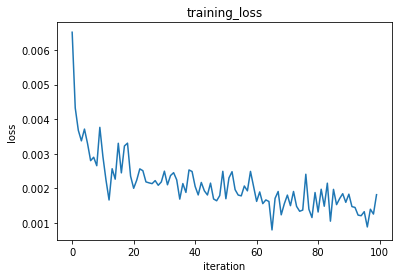

Final training accuracy:0.9292389853137517
Final validation accuracy:0.8566978193146417


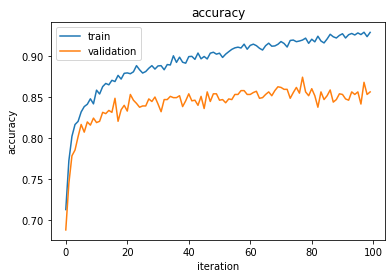

In [26]:
use_cuda = True
torch.manual_seed(1)
model_ANN_152_with_drop_out = ANNClassifier_dropout()
if use_cuda and torch.cuda.is_available():
    model_ANN_152_with_drop_out.cuda()

train(model_ANN_152_with_drop_out, feature_train_set, feature_val_set, batch_size=128, learning_rate=0.001, num_epoch=100)

In [33]:
mask_weared_incorrect_accuracy = get_accuracy_each_class(model_ANN_152_with_drop_out, feature_test_loader, 0)
with_mask_accuracy = get_accuracy_each_class(model_ANN_152_with_drop_out, feature_test_loader, 1)
without_mask_accuracy = get_accuracy_each_class(model_ANN_152_with_drop_out, feature_test_loader, 2)

print("class=mask_worn_incorrectly, accuracy={}\nclass=with_mask, accuracy={}\nclass=without_mask, accuracy={}".format(mask_weared_incorrect_accuracy, with_mask_accuracy, without_mask_accuracy))

class=mask_worn_incorrectly, accuracy=0.6151761517615176
class=with_mask, accuracy=0.934020618556701
class=without_mask, accuracy=0.9023255813953488
